## Assignment:Advanced Regression

In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Import the data file
house_price = pd.read_csv('/home/raji/Desktop/ml_andrewng/Datamining/IIIT_material/statistics/IIIT_assignment4/train.csv')

In [3]:

house_price.shape

(1460, 81)

In [4]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
house_price.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:

house_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
#Droppping the ID column as it is not needed
house_price = house_price.drop(['Id'], axis=1)


## EDA

In [8]:
#Category List created
Category_list= house_price.select_dtypes(include=['object'])

In [9]:
for i in Category_list:
   print(house_price[i].value_counts())
  
        

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64
Grvl    50
Pave    41
Name: Alley, dtype: int64
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype:

In [10]:
# Droping columns having single unique value above 90% percentage
house_price.drop(['Street', 'LandContour','Utilities','LandSlope','Condition2', 'RoofMatl','BsmtCond','Heating','CentralAir', 'Electrical','BsmtHalfBath','KitchenAbvGr', 'Functional','GarageQual','GarageCond'], axis = 1, inplace = True)

In [11]:
house_price.shape

(1460, 65)

In [12]:
house_price.drop(['LotFrontage'], axis = 1, inplace = True)

In [13]:
# All columns having NA which is meaning ful 
NA_list= ['Alley','BsmtQual','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType',
'PoolQC','Fence','MasVnrType']

In [14]:
#Replace the columns with NA to None
for i in NA_list:
    house_price[i].fillna("None", inplace=True)
    house_price[i].fillna("None", inplace=True)

In [15]:
#Dropping the values as they dont give any important information
house_price.drop(['YearRemodAdd', 'YrSold'], axis = 1, inplace = True)

In [16]:
#converting year to number of years to numbers or age

max_yearBuilt = house_price.YearBuilt.max()

max_GarageYrBlt = house_price.GarageYrBlt.max()

house_price['YearBuilt'] = max_yearBuilt - house_price['YearBuilt']
house_price['GarageYrBlt'] = max_GarageYrBlt - house_price['GarageYrBlt']


In [17]:
house_price.shape

(1460, 62)

In [18]:
#Checking coulmns with missing values and their percentage
percentage = (house_price.isnull().sum()/house_price.isnull().count()).sort_values(ascending=False)
percentage

MiscFeature     0.963014
GarageFinish    0.055479
GarageYrBlt     0.055479
MasVnrArea      0.005479
SalePrice       0.000000
                  ...   
BsmtFullBath    0.000000
GrLivArea       0.000000
LowQualFinSF    0.000000
2ndFlrSF        0.000000
MSSubClass      0.000000
Length: 62, dtype: float64

In [19]:
# Imputing with median values on columns having Null Values
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy="median")

In [20]:
# Filling missing values in with median 
house_price["GarageFinish"].fillna(house_price["GarageYrBlt"].median(), inplace=True)
house_price["GarageYrBlt"].fillna(house_price["GarageYrBlt"].median(), inplace=True)
house_price["MasVnrArea"].fillna(house_price["MasVnrArea"].median(), inplace=True)


In [21]:
#Percentgae after fixing the Null the values
percentage = (house_price.isnull().sum()/house_price.isnull().count()).sort_values(ascending=False)
percentage

MiscFeature     0.963014
SalePrice       0.000000
Exterior1st     0.000000
BsmtUnfSF       0.000000
BsmtFinSF2      0.000000
                  ...   
FullBath        0.000000
BsmtFullBath    0.000000
GrLivArea       0.000000
LowQualFinSF    0.000000
MSSubClass      0.000000
Length: 62, dtype: float64

In [22]:
#Get all category data 
categorical_list= house_price.select_dtypes(include=['object'])
categorical_list

,MSZoning,Alley,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,...,KitchenQual,FireplaceQu,GarageType,GarageFinish,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,None,Reg,Inside,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,...,Gd,None,Attchd,RFn,Y,None,None,NaN,WD,Normal
1,RL,None,Reg,FR2,Veenker,Feedr,1Fam,1Story,Gable,MetalSd,...,TA,TA,Attchd,RFn,Y,None,None,NaN,WD,Normal
2,RL,None,IR1,Inside,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,...,Gd,TA,Attchd,RFn,Y,None,None,NaN,WD,Normal
3,RL,None,IR1,Corner,Crawfor,Norm,1Fam,2Story,Gable,Wd Sdng,...,Gd,Gd,Detchd,Unf,Y,None,None,NaN,WD,Abnorml
4,RL,None,IR1,FR2,NoRidge,Norm,1Fam,2Story,Gable,VinylSd,...,Gd,TA,Attchd,RFn,Y,None,None,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,None,Reg,Inside,Gilbert,Norm,1Fam,2Story,Gable,VinylSd,...,TA,TA,Attchd,RFn,Y,None,None,NaN,WD,Normal
1456,RL,None,Reg,Inside,NWAmes,Norm,1Fam,1Story,Gable,Plywood,...,TA,TA,Attchd,Unf,Y,None,MnPrv,NaN,WD,Normal
1457,RL,None,Reg,Inside,Crawfor,Norm,1Fam,2Story,Gable,CemntBd,...,Gd,Gd,Attchd,RFn,Y,None,GdPrv,Shed,WD,Normal
1458,RL,None,Reg,Inside,NAmes,Norm,1Fam,1Story,Hip,MetalSd,...,Gd,None,Attchd,Unf,Y,None,None,NaN,WD,Normal


In [23]:
#Get all numerical data
numerical_list = house_price.select_dtypes(include=['float64', 'int64'])
numerical_list.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice
0,60,8450,7,5,7,196.0,706,0,150,856,...,548,0,61,0,0,0,0,0,2,208500
1,20,9600,6,8,34,0.0,978,0,284,1262,...,460,298,0,0,0,0,0,0,5,181500
2,60,11250,7,5,9,162.0,486,0,434,920,...,608,0,42,0,0,0,0,0,9,223500
3,70,9550,7,5,95,0.0,216,0,540,756,...,642,0,35,272,0,0,0,0,2,140000
4,60,14260,8,5,10,350.0,655,0,490,1145,...,836,192,84,0,0,0,0,0,12,250000


## Plot of all numerical data

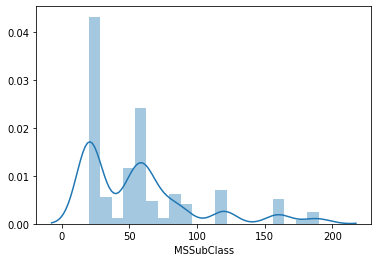

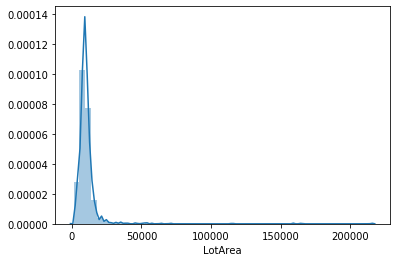

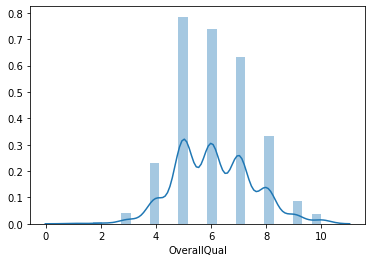

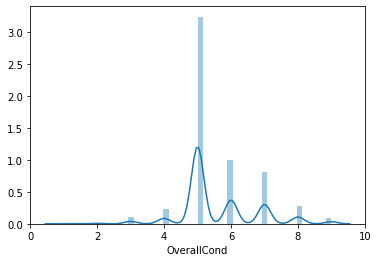

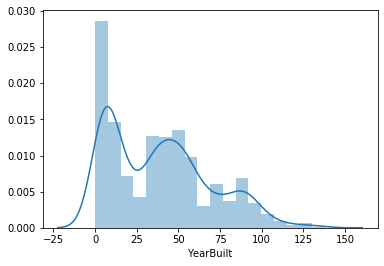

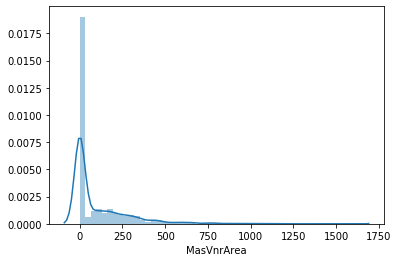

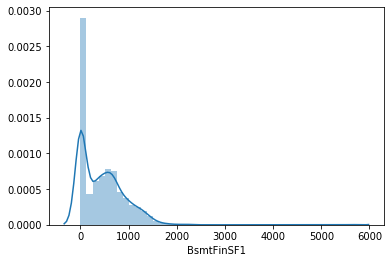

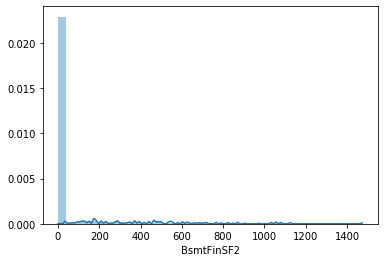

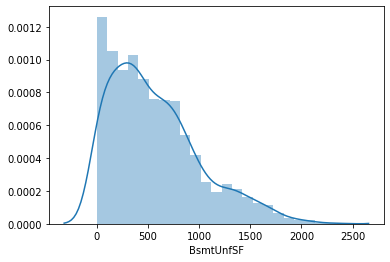

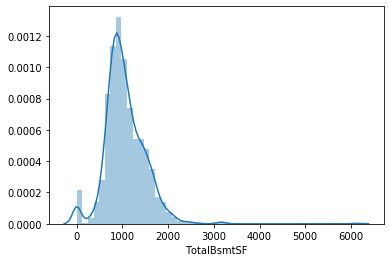

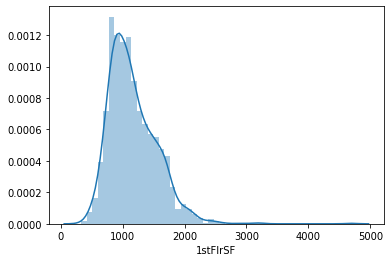

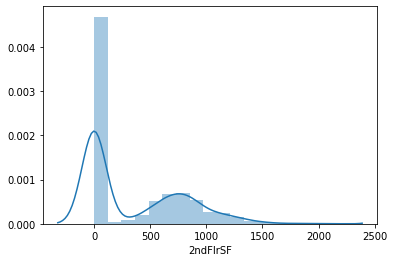

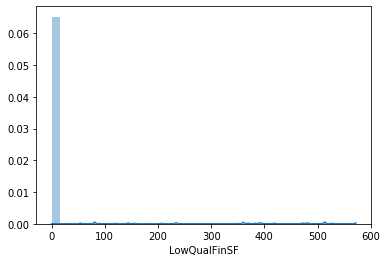

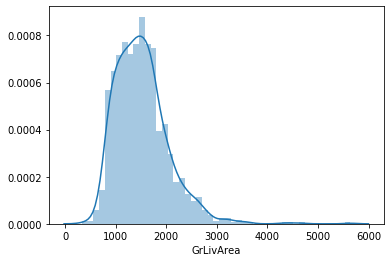

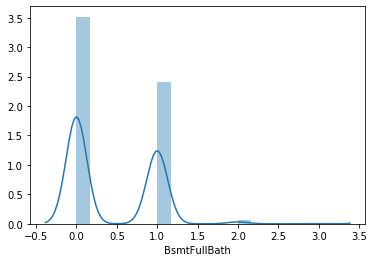

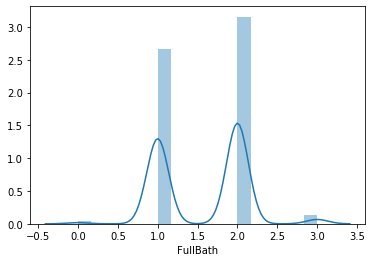

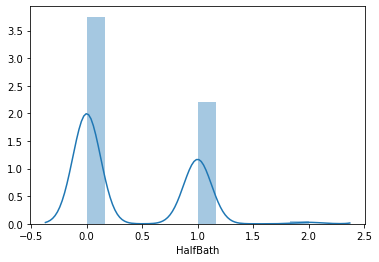

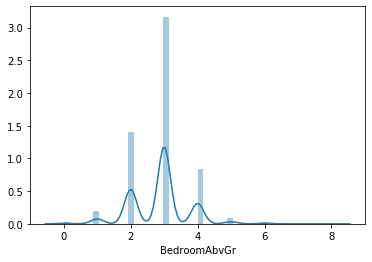

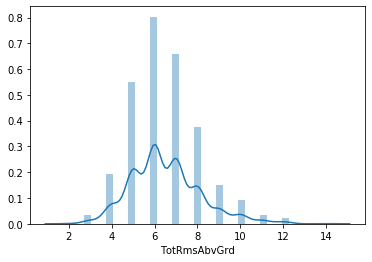

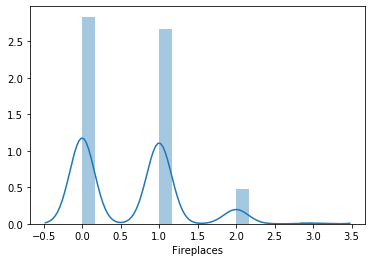

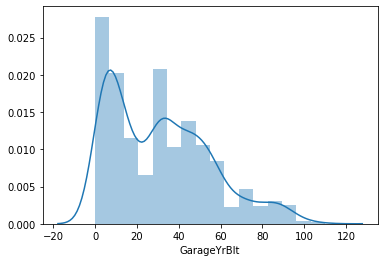

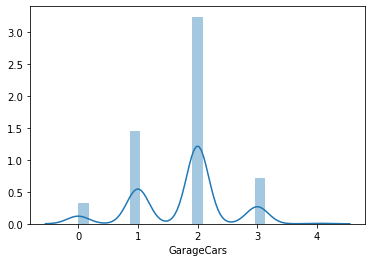

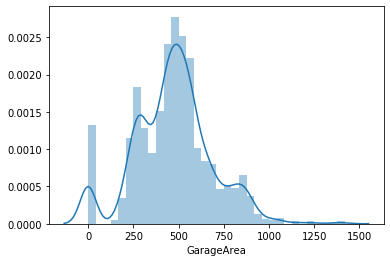

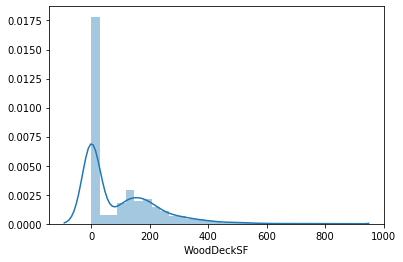

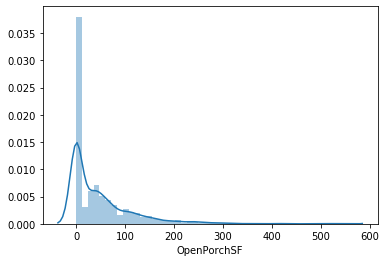

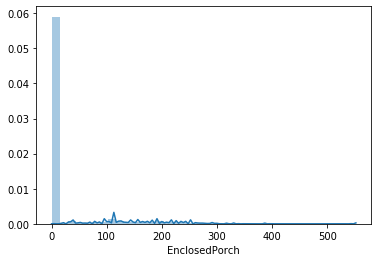

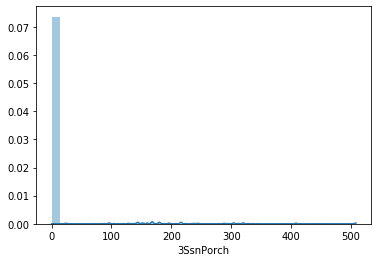

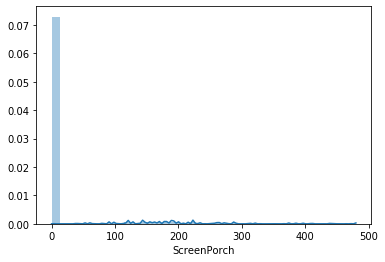

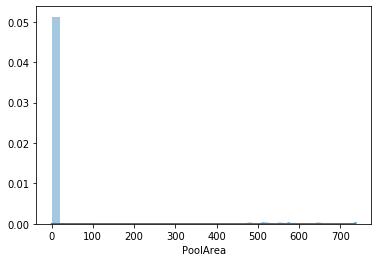

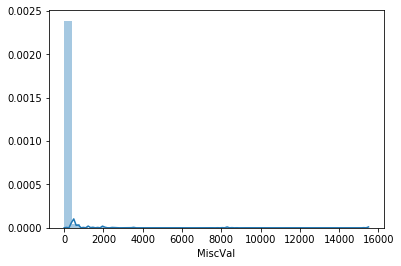

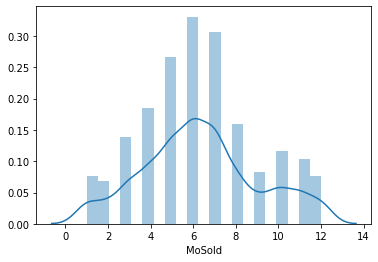

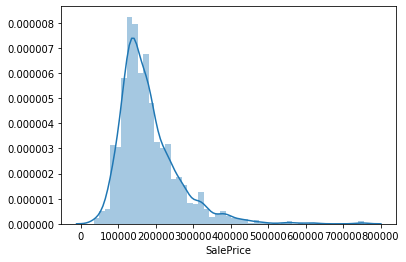

In [24]:
for i in numerical_list:
    sns.distplot(house_price[i])
    plt.show()

##### Notice that Sale price is skewed

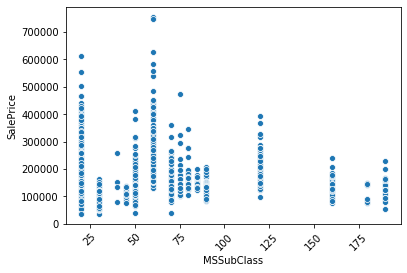

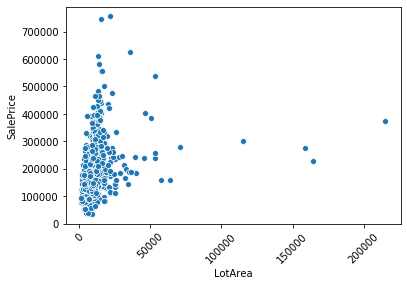

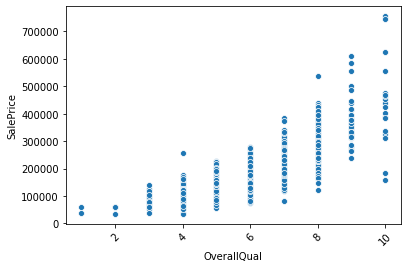

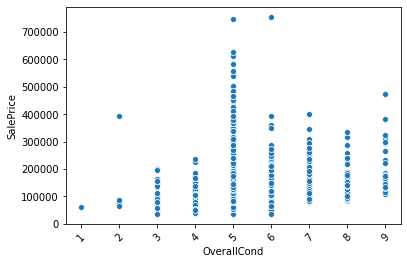

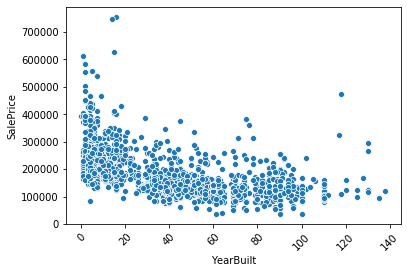

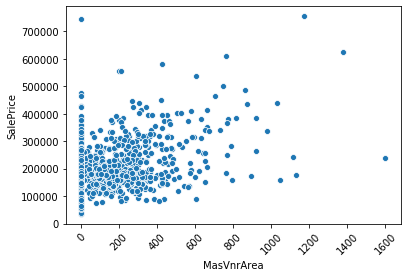

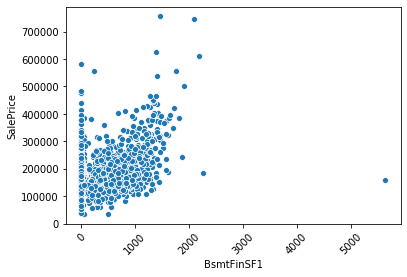

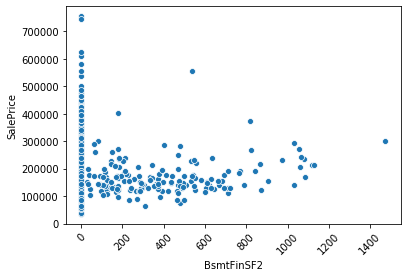

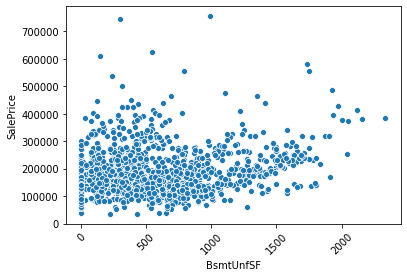

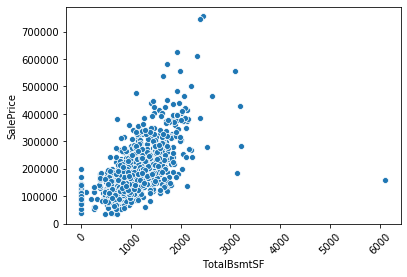

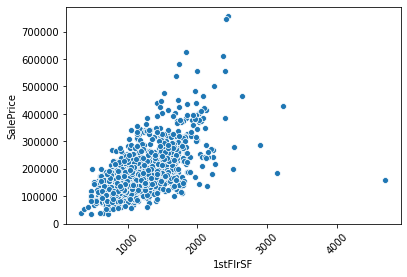

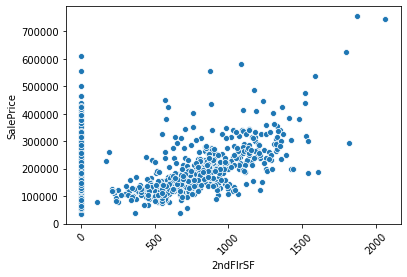

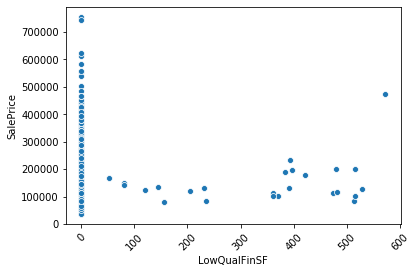

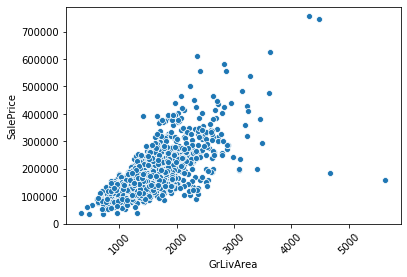

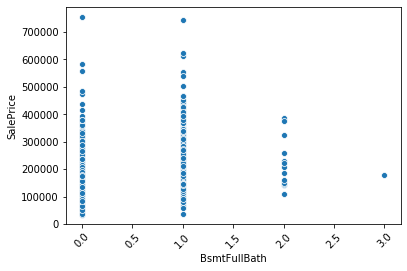

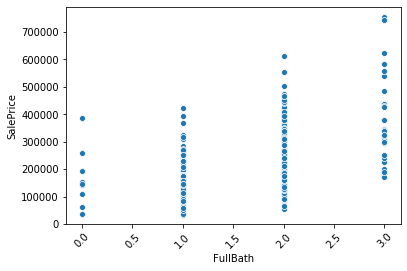

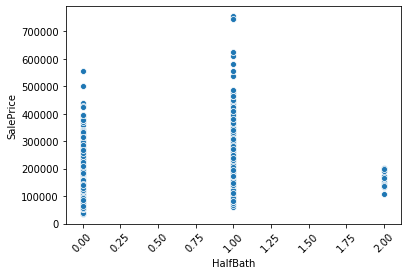

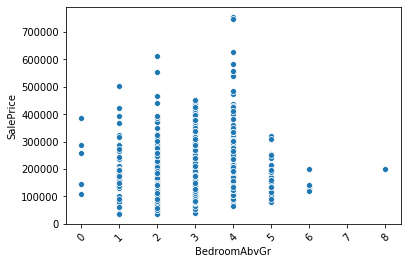

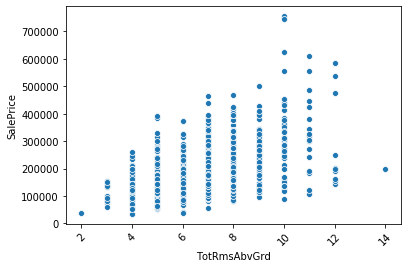

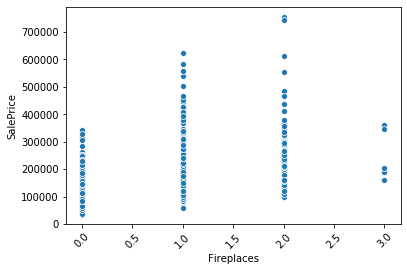

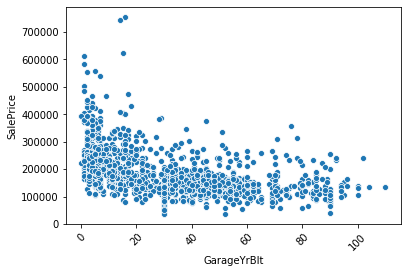

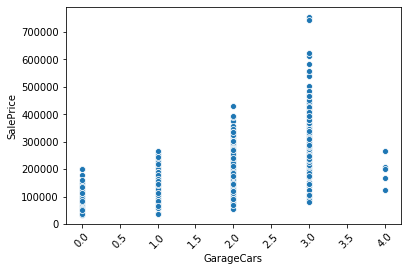

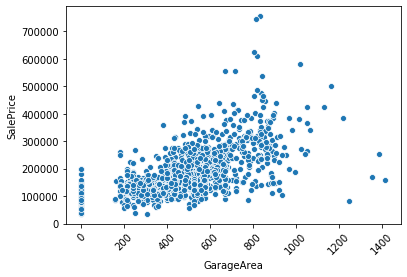

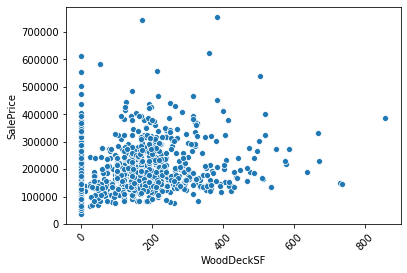

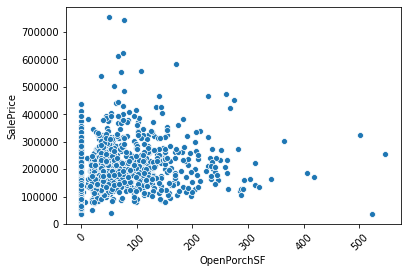

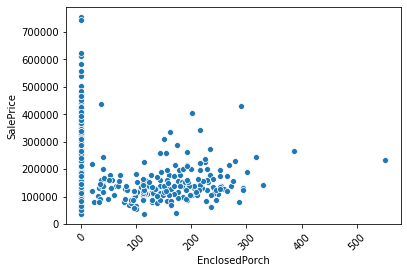

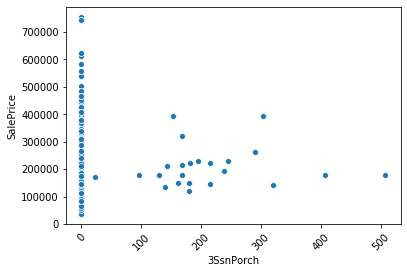

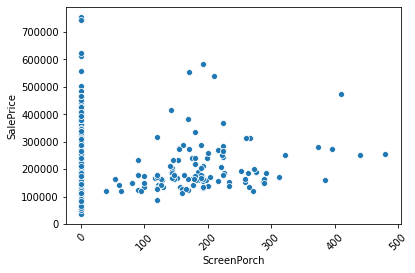

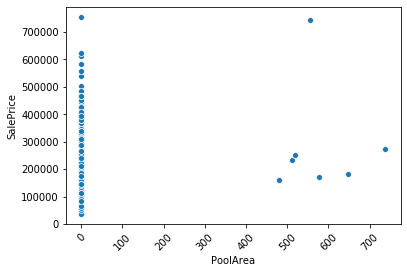

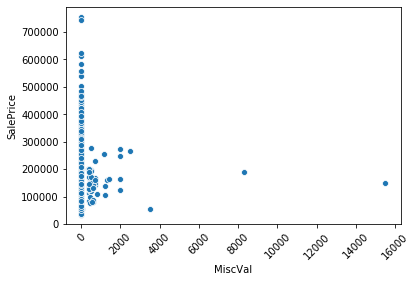

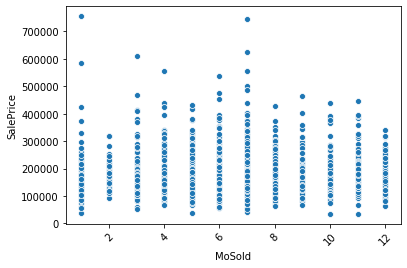

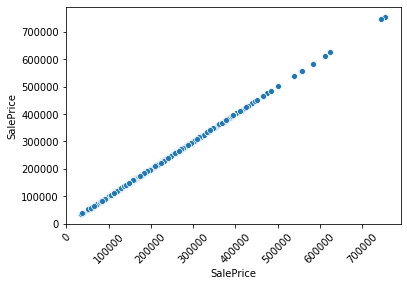

In [25]:
for i in numerical_list:
    sns.scatterplot(x=house_price[i], y=house_price["SalePrice"], data=numerical_list)
    plt.xticks(rotation=45)
    plt.show()

In [26]:
#correlation matrix
cor = numerical_list.corr()
cor

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice
MSSubClass,1.000000,-0.139781,0.032628,-0.059316,-0.027850,0.023573,-0.069836,-0.065649,-0.140759,-0.238518,...,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.084284
LotArea,-0.139781,1.000000,0.105806,-0.005636,-0.014228,0.103321,0.214103,0.111170,-0.002618,0.260833,...,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,0.263843
OverallQual,0.032628,0.105806,1.000000,-0.091932,-0.572323,0.407252,0.239666,-0.059119,0.308159,0.537808,...,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,0.790982
OverallCond,-0.059316,-0.005636,-0.091932,1.000000,0.375983,-0.125694,-0.046231,0.040229,-0.136841,-0.171098,...,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,-0.077856
YearBuilt,-0.027850,-0.014228,-0.572323,0.375983,1.000000,-0.311600,-0.249503,0.049107,-0.149040,-0.391452,...,-0.478954,-0.224880,-0.188686,0.387268,-0.031355,0.050364,-0.004950,0.034383,-0.012398,-0.522897
MasVnrArea,0.023573,0.103321,0.407252,-0.125694,-0.311600,1.000000,0.261256,-0.071330,0.113862,0.360067,...,0.370884,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,0.472614
BsmtFinSF1,-0.069836,0.214103,0.239666,-0.046231,-0.249503,0.261256,1.000000,-0.050117,-0.495251,0.522396,...,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.386420
BsmtFinSF2,-0.065649,0.111170,-0.059119,0.040229,0.049107,-0.071330,-0.050117,1.000000,-0.209294,0.104810,...,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,-0.011378
BsmtUnfSF,-0.140759,-0.002618,0.308159,-0.136841,-0.149040,0.113862,-0.495251,-0.209294,1.000000,0.415360,...,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.034888,0.214479
TotalBsmtSF,-0.238518,0.260833,0.537808,-0.171098,-0.391452,0.360067,0.522396,0.104810,0.415360,1.000000,...,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,0.613581


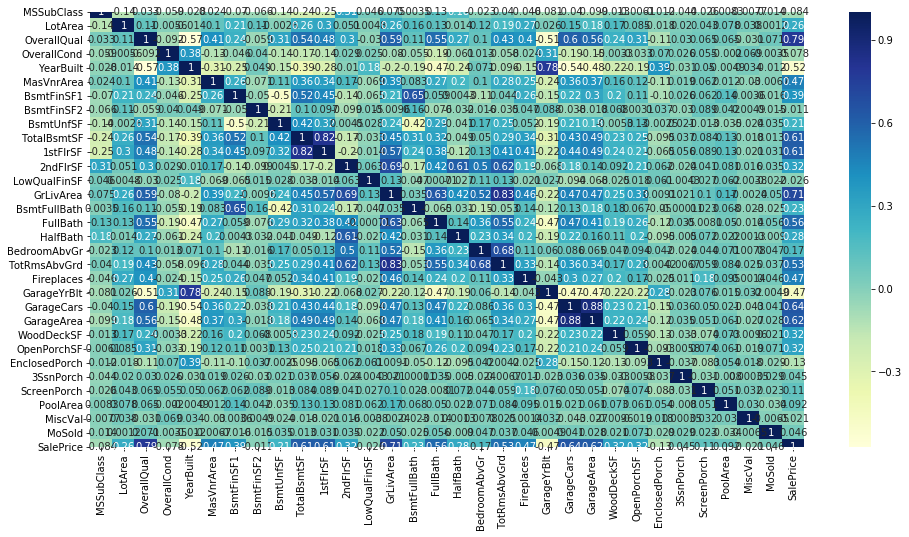

In [27]:
# plotting correlations on a heatmap


plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [28]:
#Seperate the traget variable which Saleprice from the data
Y = house_price['SalePrice']
house_price_new = house_price
house_price_new

,MSSubClass,MSZoning,LotArea,Alley,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,None,Reg,Inside,CollgCr,Norm,1Fam,2Story,...,0,0,None,None,NaN,0,2,WD,Normal,208500
1,20,RL,9600,None,Reg,FR2,Veenker,Feedr,1Fam,1Story,...,0,0,None,None,NaN,0,5,WD,Normal,181500
2,60,RL,11250,None,IR1,Inside,CollgCr,Norm,1Fam,2Story,...,0,0,None,None,NaN,0,9,WD,Normal,223500
3,70,RL,9550,None,IR1,Corner,Crawfor,Norm,1Fam,2Story,...,0,0,None,None,NaN,0,2,WD,Abnorml,140000
4,60,RL,14260,None,IR1,FR2,NoRidge,Norm,1Fam,2Story,...,0,0,None,None,NaN,0,12,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,7917,None,Reg,Inside,Gilbert,Norm,1Fam,2Story,...,0,0,None,None,NaN,0,8,WD,Normal,175000
1456,20,RL,13175,None,Reg,Inside,NWAmes,Norm,1Fam,1Story,...,0,0,None,MnPrv,NaN,0,2,WD,Normal,210000
1457,70,RL,9042,None,Reg,Inside,Crawfor,Norm,1Fam,2Story,...,0,0,None,GdPrv,Shed,2500,5,WD,Normal,266500
1458,20,RL,9717,None,Reg,Inside,NAmes,Norm,1Fam,1Story,...,0,0,None,None,NaN,0,4,WD,Normal,142125


In [29]:
#Drop the SalePrice column
house_price_new.drop(['SalePrice'], axis = 1, inplace = True)

In [30]:
# All categorical variables
new_categorical = house_price_new.select_dtypes(include=['object'])
new_categorical.columns

Index(['MSZoning', 'Alley', 'LotShape', 'LotConfig', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
       'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [31]:
# Convert all Categorical into dummies
house_dummies = pd.get_dummies(new_categorical, drop_first=True)
house_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [32]:
# Drop categorical variable columns
house_price_new = house_price_new.drop(list(new_categorical.columns), axis=1)

In [33]:
# Concatenate dummy variables with X
house_price_new = pd.concat([house_price_new, house_dummies], axis=1)

In [34]:
# First few rows
house_price_new.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,7,196.0,706,0,150,856,...,0,0,0,0,1,0,0,0,1,0
1,20,9600,6,8,34,0.0,978,0,284,1262,...,0,0,0,0,1,0,0,0,1,0
2,60,11250,7,5,9,162.0,486,0,434,920,...,0,0,0,0,1,0,0,0,1,0
3,70,9550,7,5,95,0.0,216,0,540,756,...,0,0,0,0,1,0,0,0,0,0
4,60,14260,8,5,10,350.0,655,0,490,1145,...,0,0,0,0,1,0,0,0,1,0


## Feature Scaling and Data preparation

In [35]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
col_name = house_price_new.columns
X = pd.DataFrame(scale(house_price_new))
house_price_new.columns = col_name
house_price_new.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=202)

In [36]:
#Transforming the target variable using log
Y_log = np.log(Y)

In [37]:
Y_log

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

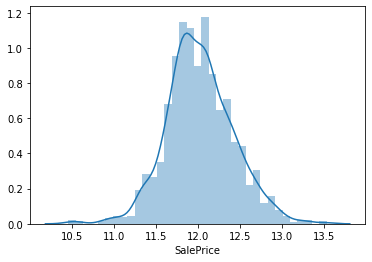

In [38]:
sns.distplot(Y_log)

In [39]:
Y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [40]:
# split into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(house_price_new, Y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

## Model Building and Evaluation

## Ridge

In [41]:
# list of alphas to tune
#Ridge
list_alpha = [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]
params = {'alpha': list_alpha}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [42]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006060,0.001553,0.001529,0.000430,0.0001,{'alpha': 0.0001},-21041.651451,-20758.757119,-19134.582247,-17946.433100,...,-19395.737765,1299.814372,26,-13246.894377,-13061.148562,-12187.982080,-13239.828604,-13266.872441,-13000.545213,412.990619
1,0.003489,0.000037,0.000987,0.000044,0.001,{'alpha': 0.001},-19879.749073,-20757.595093,-19253.880060,-18050.159354,...,-19231.229397,1018.083126,18,-13339.780441,-13060.971850,-12264.896226,-13306.257203,-13379.449130,-13070.270970,417.763317
2,0.003435,0.000010,0.000961,0.000024,0.01,{'alpha': 0.01},-18218.638940,-20746.115061,-19608.331105,-18225.290382,...,-19075.967687,976.810061,13,-13601.713922,-13059.580106,-12480.982105,-13554.876139,-13678.665157,-13275.163486,452.744567
3,0.003464,0.000042,0.000965,0.000014,0.05,{'alpha': 0.05},-17921.167807,-20703.804097,-19746.165761,-18088.108043,...,-19042.303944,1049.301124,11,-13781.732919,-13055.139199,-12610.095636,-13726.224687,-13863.858541,-13407.410196,491.916789
4,0.003453,0.000019,0.000946,0.000013,0.1,{'alpha': 0.1},-17941.041073,-20661.114424,-19835.906220,-17968.008345,...,-19053.151219,1062.868687,12,-13950.160208,-13052.076854,-12729.912784,-13882.988694,-14020.434746,-13527.114657,531.068794


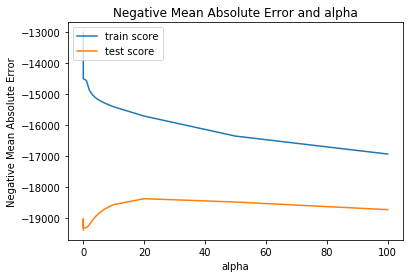

In [43]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

## Question2 : optimal value for Ridge
### optimal value = 20

In [44]:
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
# ridge.coef_

Ridge(alpha=20, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [45]:

alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
y_train_pred=ridge.predict(X_train)
pred = ridge.predict(X_test)

In [46]:
from sklearn.metrics import r2_score
r2_train= r2_score(y_true=y_train,y_pred=y_train_pred)
r2_train

0.8790617858491482

In [47]:
r2_test = r2_score(y_true = y_test,y_pred=pred)
r2_test

0.8616755345775284

## Lasso

In [48]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   14.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [49]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.160643,0.011495,0.002069,0.000121,0.0001,{'alpha': 0.0001},-19103.666525,-20666.236391,-19481.980523,-18209.503399,...,-19185.098201,866.710212,26,-13424.721931,-13059.998833,-12405.154849,-13444.586588,-13555.396480,-13177.971736,420.852022
1,0.128653,0.034051,0.001599,0.000463,0.001,{'alpha': 0.001},-19103.464140,-20668.331401,-19481.890636,-18209.782674,...,-19184.066085,868.568188,25,-13424.731991,-13059.984044,-12405.155273,-13444.586290,-13555.415553,-13177.974630,420.857258
2,0.080115,0.004396,0.001087,0.000038,0.01,{'alpha': 0.01},-19101.537155,-20689.315569,-19480.935736,-18212.404433,...,-19185.284447,877.588569,27,-13424.855039,-13059.927067,-12405.250968,-13444.646398,-13555.666898,-13178.069274,420.892446
3,0.083357,0.003039,0.001090,0.000031,0.05,{'alpha': 0.05},-19092.926705,-20700.997001,-19476.765357,-18210.034039,...,-19183.178556,883.197999,24,-13425.554230,-13059.650408,-12405.903700,-13445.398611,-13556.902183,-13178.681826,421.067447
4,0.134564,0.035892,0.001876,0.000425,0.1,{'alpha': 0.1},-19082.165920,-20713.380925,-19471.665775,-18207.567001,...,-19181.017454,888.707589,23,-13426.473773,-13059.400924,-12406.728000,-13446.512187,-13558.536539,-13179.530285,421.321871


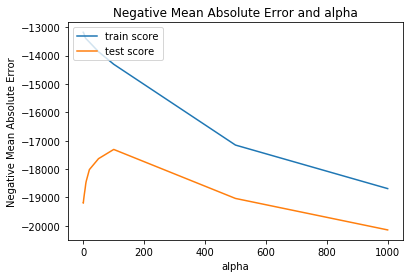

In [50]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

## Question 2: Optimal value for lasso 
### optimal value= 100

In [51]:
alpha = 100
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
y_train_pred=ridge.predict(X_train)
pred = lasso.predict(X_test)

In [52]:
from sklearn.metrics import r2_score
r2_train= r2_score(y_true=y_train,y_pred=y_train_pred)
r2_train

0.8790617858491482

In [53]:
r2_test = r2_score(y_true = y_test,y_pred=pred)
r2_test

0.7362510772661722

In [54]:
#A helper method for pretty-printing linear models
def pretty_print_linear(coefs, names = None, sort = False):
    if names == None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name)
                                   for coef, name in lst)
 


In [55]:
print("Ridge:", pretty_print_linear(ridge.coef_,names=list(X_test),sort=True))

Ridge: 22707.993 * Neighborhood_NoRidge + 19369.818 * Neighborhood_NridgHt + -18979.803 * BsmtQual_Gd + -16706.427 * PoolQC_Gd + -15846.221 * Neighborhood_Edwards + -14968.174 * KitchenQual_Gd + 14207.43 * BsmtExposure_Gd + 13835.76 * Neighborhood_Crawfor + -12898.138 * KitchenQual_TA + 12528.789 * OverallQual + 12062.344 * GarageCars + -11664.876 * BsmtQual_TA + 11579.968 * Condition1_Norm + -9770.143 * Neighborhood_Mitchel + 9462.457 * Neighborhood_Somerst + 9409.866 * Exterior1st_BrkFace + 9332.55 * BsmtFullBath + 9063.015 * HouseStyle_1Story + -9057.59 * LotShape_IR3 + -8729.99 * BsmtExposure_No + 8430.425 * LotConfig_CulDSac + 8056.77 * Exterior2nd_ImStucc + -7958.065 * HouseStyle_2Story + -7545.644 * Neighborhood_NAmes + -7510.129 * ExterQual_TA + 7496.439 * Neighborhood_StoneBr + -7394.591 * Neighborhood_Gilbert + -7361.245 * KitchenQual_Fa + 6921.532 * GarageType_None + -6486.851 * Exterior2nd_Wd Shng + -6439.461 * Condition1_PosN + -6307.798 * BsmtFinType1_Unf + -6154.841 * Ne

In [56]:
print("Lasso:", pretty_print_linear(lasso.coef_,names=list(X_test) ,sort=True))

Lasso: -446984.171 * PoolQC_Gd + 39678.733 * Neighborhood_NoRidge + 25306.436 * Neighborhood_NridgHt + -24367.655 * BsmtQual_Gd + 23129.303 * Neighborhood_Crawfor + -22422.913 * KitchenQual_Gd + -21593.038 * KitchenQual_TA + 20247.788 * Neighborhood_Somerst + 18315.73 * Neighborhood_StoneBr + -17489.133 * BsmtQual_TA + 17309.833 * BsmtExposure_Gd + -17142.043 * KitchenQual_Fa + 15001.298 * Exterior1st_BrkFace + -14003.938 * Neighborhood_Edwards + 11382.749 * Condition1_Norm + -9986.933 * Condition1_PosN + -9954.007 * Neighborhood_Mitchel + 9812.777 * OverallQual + -8799.343 * BsmtQual_Fa + 8344.443 * GarageType_None + 8307.57 * LotConfig_CulDSac + -7958.799 * BldgType_Duplex + 7957.163 * SaleType_New + 7016.895 * OverallCond + -6803.747 * BsmtExposure_No + 6701.054 * BsmtFullBath + 5936.967 * GarageCars + -5435.939 * HouseStyle_2Story + -5423.613 * Neighborhood_NAmes + 5075.926 * MasVnrType_None + 4696.268 * MSZoning_RL + 4509.452 * Neighborhood_Veenker + 4433.602 * BsmtFinType2_Unf + 

### The top 5 variables are 
#### PoolQC_Gd
#### Neighborhood_NoRidge
#### Neighborhood_NridgHt
####  BsmtQual_Gd
#### Neighborhood_Crawfor


## Question 1:
### sub:What will be the changes in the model if you choose double the value of alpha for both ridge and lasso

### Ridge after doubling the alpha

In [57]:
alpha = 40
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
# ridge.coef_

Ridge(alpha=40, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [58]:
print("Ridge:", pretty_print_linear(ridge.coef_,names=list(X_test),sort=True))

Ridge: 15731.335 * Neighborhood_NoRidge + -15165.477 * BsmtQual_Gd + 14693.795 * Neighborhood_NridgHt + 13180.467 * OverallQual + -12007.984 * Neighborhood_Edwards + 11772.032 * BsmtExposure_Gd + -11304.69 * KitchenQual_Gd + 10509.22 * Condition1_Norm + 10136.2 * GarageCars + 9743.057 * Neighborhood_Crawfor + -9396.693 * KitchenQual_TA + -9151.622 * PoolQC_Gd + 8559.303 * BsmtFullBath + -8378.641 * BsmtExposure_No + -7892.608 * BsmtQual_TA + 6988.592 * HouseStyle_1Story + 6670.412 * Exterior1st_BrkFace + -6669.931 * ExterQual_TA + 6509.281 * LotConfig_CulDSac + -6320.931 * Neighborhood_Mitchel + 6227.082 * Neighborhood_Somerst + 6142.159 * BsmtFinType1_GLQ + 6023.3 * OverallCond + -6023.003 * LotShape_IR3 + -5912.879 * HouseStyle_2Story + -5909.851 * Neighborhood_Gilbert + -5799.693 * Neighborhood_NAmes + -5580.99 * BsmtFinType1_Unf + -5543.149 * Neighborhood_CollgCr + 5149.521 * GarageType_None + 5003.96 * MasVnrType_None + 4900.188 * Exterior2nd_ImStucc + -4498.678 * Condition1_PosN 

####  OverallQual,Neighborhood_Edwards is added and PoolQC_Gd is removed


## Lasso

In [59]:
alpha = 200
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)

pred = lasso.predict(X_test)

In [60]:
print("Lasso:", pretty_print_linear(lasso.coef_,names=list(X_test) ,sort=True))

Lasso: -289769.934 * PoolQC_Gd + 37274.261 * Neighborhood_NoRidge + 25248.672 * Neighborhood_NridgHt + -20346.845 * BsmtQual_Gd + 19798.452 * Neighborhood_Crawfor + -17476.343 * KitchenQual_Gd + 16898.831 * Neighborhood_Somerst + -16232.409 * KitchenQual_TA + 16209.259 * BsmtExposure_Gd + 12525.815 * Condition1_Norm + -12241.348 * Neighborhood_Edwards + -11751.922 * BsmtQual_TA + 11524.345 * OverallQual + 11445.871 * Exterior1st_BrkFace + 8437.107 * Neighborhood_StoneBr + 7687.065 * BsmtFullBath + -7436.683 * BsmtExposure_No + 7348.492 * SaleType_New + 6882.163 * GarageCars + 6701.167 * OverallCond + -6533.13 * KitchenQual_Fa + 6427.229 * LotConfig_CulDSac + -5986.824 * Neighborhood_Mitchel + 5350.298 * MasVnrType_None + -4801.648 * HouseStyle_2Story + 4717.317 * BsmtFinType1_GLQ + 4395.814 * Fireplaces + -4307.56 * Neighborhood_NAmes + 4194.283 * GarageType_None + -3985.291 * ExterQual_TA + -3701.302 * BldgType_Duplex + 3511.045 * GarageFinish_Fin + 3102.127 * MSZoning_RL + 2331.532 *

### Dint notice any change after doubling the alpha

### Question 3:
#### After removing the top 5 

In [61]:
house_price_new.drop(['PoolQC_Gd','Neighborhood_NoRidge','Neighborhood_NridgHt','BsmtQual_Gd','Neighborhood_Crawfor'], axis = 1, inplace = True)

In [62]:
# split into train and test
from sklearn.model_selection import train_test_split

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(house_price_new, Y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [63]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   14.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [64]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.152584,0.009276,0.001870,0.000033,0.0001,{'alpha': 0.0001},-19103.666525,-20666.236391,-19481.980523,-18209.503399,...,-19185.098201,866.710212,26,-13424.721931,-13059.998833,-12405.154849,-13444.586588,-13555.396480,-13177.971736,420.852022
1,0.145451,0.005819,0.001850,0.000062,0.001,{'alpha': 0.001},-19103.464140,-20668.331401,-19481.890636,-18209.782674,...,-19184.066085,868.568188,25,-13424.731991,-13059.984044,-12405.155273,-13444.586290,-13555.415553,-13177.974630,420.857258
2,0.144260,0.006030,0.001807,0.000027,0.01,{'alpha': 0.01},-19101.537155,-20689.315569,-19480.935736,-18212.404433,...,-19185.284447,877.588569,27,-13424.855039,-13059.927067,-12405.250968,-13444.646398,-13555.666898,-13178.069274,420.892446
3,0.120980,0.006168,0.001535,0.000138,0.05,{'alpha': 0.05},-19092.926705,-20700.997001,-19476.765357,-18210.034039,...,-19183.178556,883.197999,24,-13425.554230,-13059.650408,-12405.903700,-13445.398611,-13556.902183,-13178.681826,421.067447
4,0.115037,0.004344,0.001507,0.000037,0.1,{'alpha': 0.1},-19082.165920,-20713.380925,-19471.665775,-18207.567001,...,-19181.017454,888.707589,23,-13426.473773,-13059.400924,-12406.728000,-13446.512187,-13558.536539,-13179.530285,421.321871


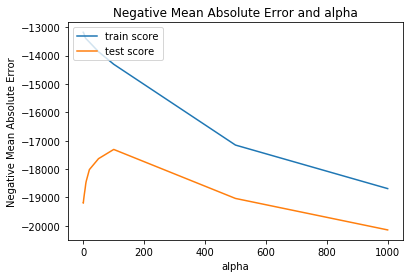

In [65]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [66]:
from sklearn.metrics import r2_score
r2 = r2_score(y_true = y_test,y_pred=pred)
r2

0.7998371330889

### Tried with y_log after transformation the curves for lasso were overlapping, so i dint use the transformed y for SalesPrice using log transformation